# Appendix 3 Technical Notes


This appendix covers a lot of the 'how to' technical detail used in the main chapters.

- [part 1: numpy and pandas](#Part-1-numpy-and-pandas)
- [part 2: XArray and pandas](#Part-2-XArray-and-pandas)
- [Part 3: CSV files and pandas](#Part-3-CSV-files-and-pandas)

## Part 1 numpy and pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Define an ndarray via a list of lists: From the 'list comprehension' formalism
arr = np.array([range(i, i+5) for i in [2, 4, 6]])

# In English: arr is a 2-D numpy array created from a list (outer square brackets)
#   The execution for each list element is the range(a, b) function
#     This generates a list of numbers a, a+1, ..., b-1
#   How many times does range(a, b) run? Three times: Once for each value of i from the [2, 4, 6] list
#
# ndarrays do not have row and column headers; strictly integer indexing
#   - has indexing equivalence where `[2][0]` is the same as `[2,0]`; but this does not translate to dataframes 
#   - row-then-column index order
#   - slice by dimension `start:stop:step`, defaults being `0, len (this dimension), 1` 
#     - exception: when `step` is negative `start` and `stop` are reversed
#     - multi-dimensional slices are separated by commas

print(arr)                 # should print the entire array
print(arr[1])              # should print the second row of the array
print(arr[1,3])            # should print the 4th element of the 2nd row
print(arr[1][3])           # should do the same; different indexing convention

In [ ]:
# ndarray construction: Notice all list elements are of the same type (strings)
arr = np.array([['l','i','s','t','1'],['s','c','n','d','2'],['t','h','r','d', '3']])

print('\nndarray from a list of lists (no comma delimiter between elements):\n\n', arr, \
      '\n\nindexing comparison: [0][2] is', arr[0][2], 'while [2][0] is', arr[2][0]) 
print('\n(may also be indexed with tuples as in [0, 2])')
print('\nConclude: ndarrays index [slow index][fast index]: equivalent to [row][column].')
print('Bear in mind that columnar data is often interpreted in a transposed sense:')
print('The fast index runs down a column.\n\n')

print("Next: Use np.zeros() to create a 2D ndarray of zeros 3 rows by 5 columns...")

z = np.zeros((3,5))

print("...and set [0,1] to 3 and [1,0] to 4:\n")
z[0,1]=3
z[1][0]=4
print(z)

In [ ]:
print('\nNow to build pandas DataFrames; here is the first:\n')

rowlist=["2row", "4row", "6row"]
columnlist = ["col_a", "col_b", "col_c", "col_d", "col_e"]
df = pd.DataFrame(data=arr, index=rowlist, columns=columnlist)

print(df, '\n\nThis DataFrame is derived directly from the ndarray above.')
print("Notice indexing order is reversed: df['col_c']['6row'] =", df['col_c']['6row'])
print("  and indexing uses row and column header strings.")

print()
print('Now to do the same thing except using the *transpose* of the source ndarray.    ')
print('Both dataframes above and below are using pd.DataFrame(data=, index=, columns=).')
print('  Suggestion: Compare the code.\n')

df = pd.DataFrame(data=arr.T, index=columnlist, columns=rowlist)

print('\nHere the row and column labels are misnomers...\n\n', df)
print("\nTo verify: Column label '2row' and row label 'col_e' yields", df['2row']['col_e'])
print('\n\nNow to do this again; this time omitting "index=" argument: Row labels default to integers:\n')

df = pd.DataFrame(data=arr, columns=columnlist)

print(df, '\n\n["col_d"][0]:', df['col_d'][0], '\n')

df = pd.DataFrame(data=arr, index=rowlist)

print(df, "\n\nfrom 'index=' but no 'columns='; element [0]['4row']:", df[0]['4row'])

print()
print("Finally skipping both 'index=' and 'columns=' we have default integer headers:\n")

df = pd.DataFrame(data=arr)

print(df, "\n\n")

## Part 2 XArray and pandas

Work in progress


```
print("\nSo far we have moved from a numpy ndarray (dimensions = 2) to a pandas dataframe. ")
print("Now for the corresponding operation from an XArray Dataset or DataArray to a pandas ")
print("dataframe. The Dataset method is `.to_dataframe()`.                               \n")
print("Example:")
print()
print("df = ds_CTD.seawater_pressure.to_dataframe()")
print()
print('The problem is that the resulting dataframe may not be indexed (row sense) using integers. A fix')
print('is necessary to override the index and columns attributes of the dataframe, as in:')
print(' ')
print('             df.index=range(len(df))')
print('             df.columns=range(1)')
print(' ')
print('results in a dataframe that one can index with integers [0] for column first then [n] for row.')
print('This example came from the profile time series analysis to get ascent start times and so on.')
print('The problem is it is a case of too much machinery. It is far simpler to use a pandas Series.')
```

**also bring in pandas Series**

## Part 3 CSV files and pandas

Suppose we have a location-focused research project; and in the course of looking around for relevant 
datasets we happen upon a CSV file plus some metadata. Here we trace through 
some exploratory steps (making use of the Python `pandas` library) to understand the 'candidate' data.


Note: The National Centers for Environmental Information ([NCEI](https://www.ncei.noaa.gov/))
data catalog is incorporated into the broader [`data.gov`](https://catalog.data.gov/) catalog.


Selected dataset links:


* [Salish Sea Cruise biogeochemical data 2008--2018](https://catalog.data.gov/dataset/a-compiled-data-product-of-profile-discrete-biogeochemical-measurements-from-35-individual-crui1) (abbreviated *SSC*: Data used in this narrative)
* [Sea surface temperature.](https://catalog.data.gov/dataset/multi-scale-ultra-high-resolution-mur-sst-analysis-fv04-1-global-0-01a-2002-present-monthly-lon)
* [FHL Seawater Data](https://www.bco-dmo.org/dataset/826798)


The plan is to identify and read in a CSV file from the SSC as a `pandas` dataframe; 
and then to parse the information. 


Here is a *read the file* code example using prior knowledge of column headers. 
The columns are renamed and several are type-converted from text to datetime.


```
fnm = 'profile_metadata.csv'
df = pd.read_csv(fnm, usecols=["1","2","4","5","7","8","10","11","13","14","16","17"])
df.columns=['r0t','r0z','r1t','r1z','a0t','a0z','a1t','a1z','d0t','d0z','d1t','d1z']
df['r0t'] = pd.to_datetime(df['r0t'])
df['a0t'] = pd.to_datetime(df['a0t'])
df['d0t'] = pd.to_datetime(df['d0t'])
```


We proceed to the NCEI 'Salish Sea Cruise' dataset. The main datafile is placed in a
logical location within the filesystem. In this case the folder hierarchy places a 
research site (the San Juan Islands) above the data resource identifier (NCEI), which 
in turn is above the dataset identifier. In the NCEI system this is referred to as an
accession number: `0238424`. This acts as a unique identifier for the NCEI dataset. 
(Accession number is also referred to as an Archival Information Package or AIP.)

```
datapath = '~/s3/sanjuans/NCEI/0238424/'    # National Center for Environmental Information
```

The downloaded dataset contains the main datafile mentioned above as well as some 
metadata. This includes the station overview below. By way of explanation: The Salish 
Sea *cruise* extended from 2008 through 2018. It consisted of multiple *legs* (research
vessel trips) to the *stations* identified in the following image. 

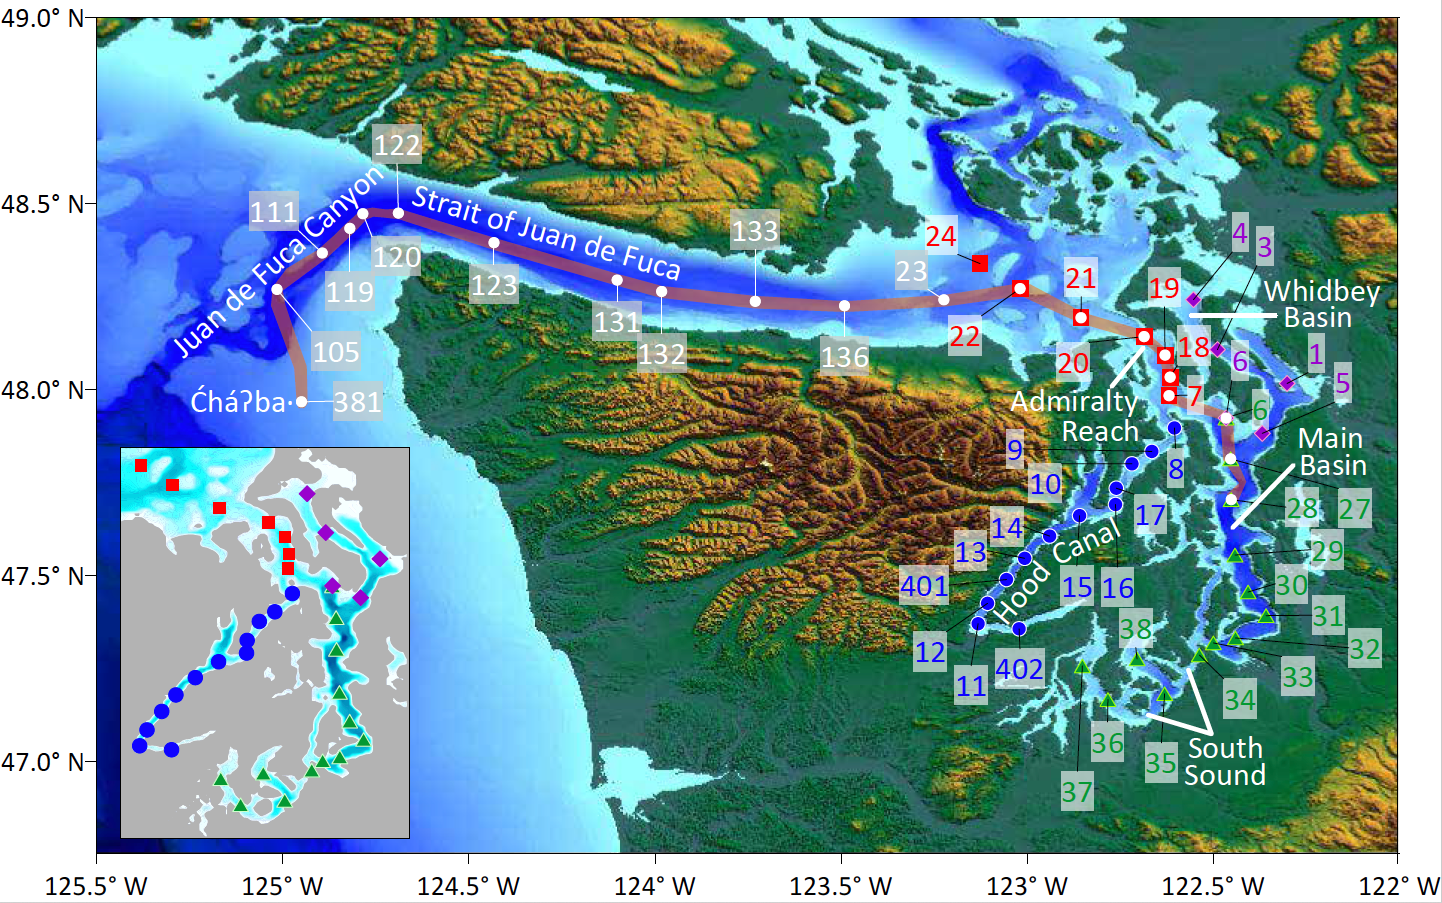

In [1]:
from IPython.display import Image
Image(filename='./../img/map_AID0238424_stations.jpg', width=900)

The research interest for this project is a physical characterization of the waters in the
San Juan islands (San Juan County, Washington). In addition to NCEI other potential data resources include: 


- [BCO-DMO](https://www.bco-dmo.org/search/dataset) (Biological and Chemical Oceanography Data Management Office, Woods Hole)
    - [Example dataset from map-based search](https://www.bco-dmo.org/dataset/826798)
- [Washington State Department of Ecology](https://apps.ecology.wa.gov/eim/search/default.aspx)
- Friday Harbor Labs
- IOOS/[NANOOS](https://nvs.nanoos.org/Explorer) coastal marine data program
- [ARGO](https://argo.ucsd.edu/data/data-from-gdacs/)
- Canadian research archives
- [Live Ocean (ROMS model-based forecast system)](https://faculty.washington.edu/pmacc/LO/LiveOcean.html)


The following Python code unpacks an NCEI CSV-format data file.

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt

csvfile = !ls ~/s3/sanjuans/NCEI/0238424/
print(csvfile)                                # a single-element list
datafile = '~/s3/sanjuans/NCEI/0238424/' + csvfile[0]
df = pd.read_csv(datafile)
df.columns                                    # what are the column headers

['SalishCruise_2008_to_2018.csv']


Index(['record', 'EXPOCODE', 'CRUISE_ID', 'DATE_UTC', 'TIME_UTC', 'DATE_LOCAL',
       'TIME_LOCAL', 'LONGITUDE_DEC', 'LATITUDE_DEC', 'STATION_NO',
       'NISKIN_NO', 'MONTH_UTC', 'DAY_UTC', 'YEAR_UTC', 'CTDPRS_DBAR',
       'CTDTMP_DEG_C_ITS90', 'CTDTMP_FLAG_W', 'CTDSAL_PSS78', 'CTDSAL_FLAG_W',
       'SIGMATHETA_KG_M3', 'RECOMMENDED_OXYGEN_UMOL_KG',
       'RECOMMENDED_OXYGEN_MG_L', 'RECOMMENDED_OXYGEN_ML_L',
       'CTDOXY_UMOL_KG_ADJ', 'CTDOXY_UMOL_KG', 'CTDOXY_MG_L_1',
       'CTDOXY_MG_L_2', 'CTDOXY_FLAG_W', 'OXYGEN_UMOL_KG', 'OXYGEN_MG_L_1',
       'OXYGEN_MG_L_2', 'OXYGEN_MG_L_3', 'OXYGEN_FLAG_W', 'TA_UMOL_KG',
       'DIC_UMOL_KG', 'TA_FLAG_W', 'DIC_FLAG_W', 'NITRATE_UMOL_KG',
       'NITRATE_UMOL_L', 'NITRITE_UMOL_KG', 'NITRITE_UMOL_L',
       'AMMONIUM_UMOL_KG', 'AMMONIUM_UMOL_L', 'PHOSPHATE_UMOL_KG',
       'PHOSPHATE_UMOL_L', 'SILICATE_UMOL_KG', 'SILICATE_UMOL_L',
       'NUTRIENTS_FLAG_W'],
      dtype='object')

The column meanings are clear for the most part. Annotation files are provided with helpful
qualifiers on particular sub-ranges of the overall dataset. 


From the `pandas` dataframe `df`: How many rows of data?

In [57]:
nsamples = len(df)
print('A total of', nsamples, 'rows of data (observations) are found in this dataset')

A total of 72861 rows of data (observations) are found in this dataset


Starting to look at the data: Distribution of pressure in decibars (approximately the water sample depth in meters) over the course of the research cruise that produced 7525 rows of data?

(350.0, 0.0)

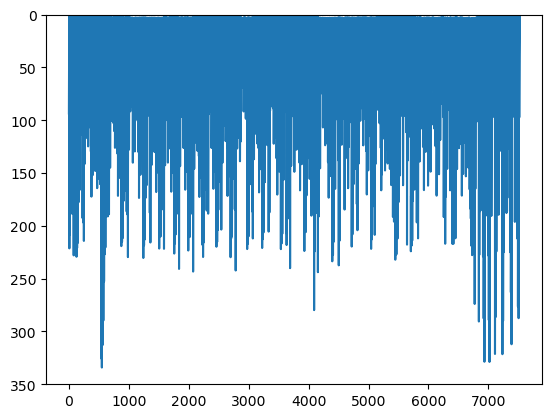

In [4]:
plt.plot(df['CTDPRS_DBAR'])
plt.ylim(350, 0)            # depth ranges from 350 meters to surface: Continental shelf

(250.0, 0.0)

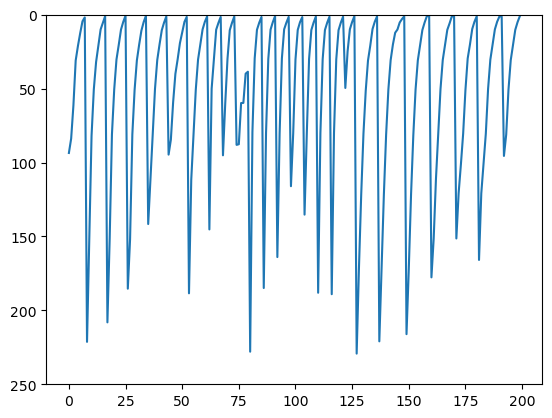

In [5]:
# zoom in on the first part of the dataset
plt.plot(df['CTDPRS_DBAR'][0:200])         # excerpt showing first 200 rows (about 25 casts)
plt.ylim(250, 0)

*Interpretation:* The dataframe table (CTD and other data) reflects a sequence of casts.
This was probably done with a [*rosette sampler*](https://en.wikipedia.org/wiki/Rosette_sampler) 
which features an array of Niskin sample bottles. At the start of the cast the bottles are open
to allow seawater to flow through them. Each bottle is triggered to close and trap a water 
sample at a particular depth; so that the ensemble comprises a discrete profile of the water column. 
While the CTD typically runs continuously *in situ* it is selectively sub-sampled to data 
corresponding to Niskin trigger depths.


The narrative so far: A set of stations were identified throughout the Salish Sea
(see map below). From 2008 through 2018 these were visited on some schedule. At each 
station a number of casts were made down as far as 300 meters. Niskin bottles were
triggered at particular depths and the collected water samples were analyzed.
Simultaneous CTD data was added to the data collection. 

(350.0, 0.0)

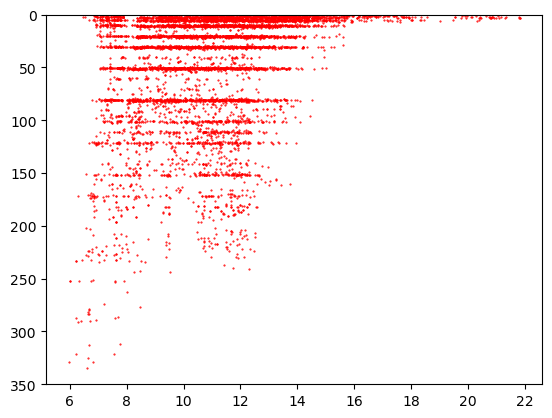

In [6]:
# temperature versus pressure distribution
plt.scatter(df['CTDTMP_DEG_C_ITS90'], df['CTDPRS_DBAR'], marker='.', s=1, c='r')
plt.ylim(350, 0)

*Interpretation:* Distributions of temperatures with depth over the ten year
cruise. Below 250 meters the water is uniformly in the 6 to 8 deg C range.
The distribution of temperatures becomes warmer towards the surface. 


A standardization of sampling depths is apparent in the horizontal banding.


A detail of interest: Did sampling events span the year or were they constrained to a 
particular time of year?

In [7]:
print(pd.to_datetime(['1970-8-12'])[0])        # pandas conversion to datetimes: list > list

1970-08-12 00:00:00


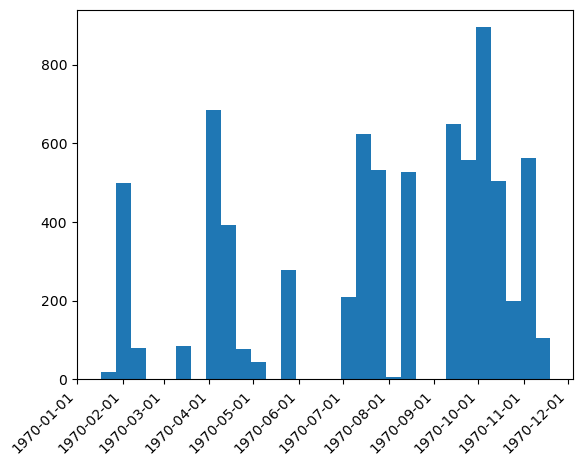

In [8]:
time_of_year = pd.to_datetime(['1970-' + df['DATE_LOCAL'][i].split('/')[0] + '-' + \
                               df['DATE_LOCAL'][i].split('/')[1] for i in range(nsamples)])
labels = pd.to_datetime(['1970-' + str(i) + '-1' for i in range(1,13)])
plt.hist(time_of_year, 30)
plt.xticks(labels, labels.date, rotation=45, ha='right') # Rotate x-axis labels
plt.show()

*Interpretation:* The station profiles for this dataset were distributed 
throughout the course of the year with more of the sampling occurring July
through November.

(350.0, 0.0)

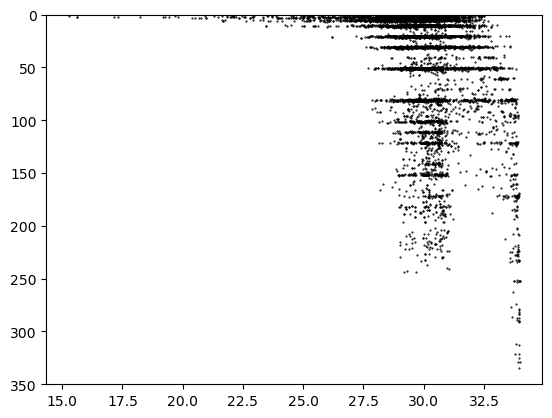

In [9]:
# salinity with depth: saline water is more dense
plt.scatter(df['CTDSAL_PSS78'], df['CTDPRS_DBAR'], marker='.', s=1, c='k')
plt.ylim(350, 0)

*Interpretation:* Both temperature and salinity across the 10-year dataset have
a bimodal distribution extending down to the 250-350 meter depth range. One
idea to explain this is that one mass of water is deep (to 350 m) cold and saline;
while the other is deep (but only to 250 m), warmer and less saline. 


One obvious
next step would be to split the two distributions and plot the locations for
both.

In [10]:
# reminder of column names
df.columns

Index(['record', 'EXPOCODE', 'CRUISE_ID', 'DATE_UTC', 'TIME_UTC', 'DATE_LOCAL',
       'TIME_LOCAL', 'LONGITUDE_DEC', 'LATITUDE_DEC', 'STATION_NO',
       'NISKIN_NO', 'MONTH_UTC', 'DAY_UTC', 'YEAR_UTC', 'CTDPRS_DBAR',
       'CTDTMP_DEG_C_ITS90', 'CTDTMP_FLAG_W', 'CTDSAL_PSS78', 'CTDSAL_FLAG_W',
       'SIGMATHETA_KG_M3', 'RECOMMENDED_OXYGEN_UMOL_KG',
       'RECOMMENDED_OXYGEN_MG_L', 'RECOMMENDED_OXYGEN_ML_L',
       'CTDOXY_UMOL_KG_ADJ', 'CTDOXY_UMOL_KG', 'CTDOXY_MG_L_1',
       'CTDOXY_MG_L_2', 'CTDOXY_FLAG_W', 'OXYGEN_UMOL_KG', 'OXYGEN_MG_L_1',
       'OXYGEN_MG_L_2', 'OXYGEN_MG_L_3', 'OXYGEN_FLAG_W', 'TA_UMOL_KG',
       'DIC_UMOL_KG', 'TA_FLAG_W', 'DIC_FLAG_W', 'NITRATE_UMOL_KG',
       'NITRATE_UMOL_L', 'NITRITE_UMOL_KG', 'NITRITE_UMOL_L',
       'AMMONIUM_UMOL_KG', 'AMMONIUM_UMOL_L', 'PHOSPHATE_UMOL_KG',
       'PHOSPHATE_UMOL_L', 'SILICATE_UMOL_KG', 'SILICATE_UMOL_L',
       'NUTRIENTS_FLAG_W'],
      dtype='object')

In [11]:
# A snapshot of the first 17 rows of data: October 24 2016
#   Note that for this day there were two stations (shift in location between row 8 and 9)

print(f"Date      Time          Depth    Temp      Salinity  Density   Oxygen        Lat       Lon")
for i in range(0, 17): 
    print(f"{df['DATE_UTC'][i]:<10}{df['TIME_LOCAL'][i]:<10}\
    {df['CTDPRS_DBAR'][i]:<9}{df['CTDTMP_DEG_C_ITS90'][i]:<10}{df['CTDSAL_PSS78'][i]:<10}{df['SIGMATHETA_KG_M3'][i]:<10}{df['OXYGEN_UMOL_KG'][i]:<10}\
    {df['LATITUDE_DEC'][i]:<10}{df['LONGITUDE_DEC'][i]:<10}")

Date      Time          Depth    Temp      Salinity  Density   Oxygen        Lat       Lon
10/24/16  10:45:37      93.544   8.3173    33.6      26.127    120.9         47.9646   -124.9496 
10/24/16  10:46:31      83.808   8.9314    33.3691   25.852    143.8         47.9644   -124.95   
10/24/16  10:47:42      61.264   10.4864   32.9718   25.287    196.6         47.9639   -124.9504 
10/24/16  10:50:02      30.972   12.3048   32.3692   24.49     265.4         47.9633   -124.9507 
10/24/16  10:51:10      21.093   12.7246   32.2833   24.343    267.6         47.9631   -124.951  
10/24/16  10:52:08      12.399   12.7313   32.2817   24.341    275.5         47.9629   -124.9512 
10/24/16  10:52:46      4.463    12.7299   32.2815   24.341    267.7         47.963    -124.9512 
10/24/16  10:53:47      1.854    12.7304   32.2811   24.34     270.8         47.9629   -124.9509 
10/24/16  16:24:24      221.307  7.8235    33.722    26.296    90.4          48.3914   -124.4333 
10/24/16  16:27:00      152

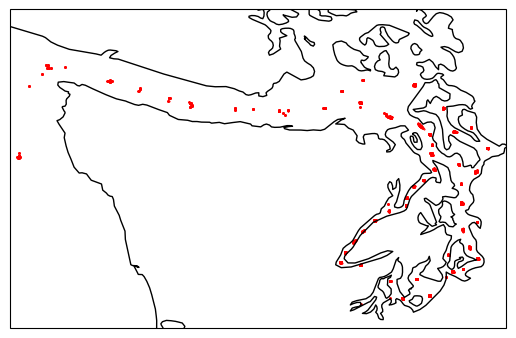

In [12]:
# Each row of data has a latitude/longitude. Create a map to show these locations.

import cartopy.crs as ccrs
import cartopy.feature as cf

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
ax.set_extent([-125, -122.2, 47, 48.8], crs=ccrs.PlateCarree())
ax.scatter(df['LONGITUDE_DEC'],df['LATITUDE_DEC'], marker='.', s=1, c='r')
plt.show()

Conclusion: The 7525 data values are subdivided into a sequence of casts over ten years
that spanned the Strait of Juan de Fuca and Puget Sound. Alas only one location is close
to Cattle Pass (southern tip of San Juan Island). So this dataset is not really what
we are looking for. 

In [56]:
# FHLOO data
datapath = '~/s3/sanjuans/BCO-DMO/FHLOO/826798/'
csvfile = !ls ~/s3/sanjuans/BCO-DMO/FHLOO/826798
datafile= datapath + csvfile[1]
print(datafile)
df = pd.read_csv(datafile)
print(df.columns)
print(len(df), 'rows of data')

~/s3/sanjuans/BCO-DMO/FHLOO/826798/826798_v3_fhloo.csv
Index(['ISO_DateTime_UTC', 'ISO_DateTime_Local', 'Dox', 'OxSat',
       'Sea_Temp_Oxygen', 'pCO2', 'Sea_Temp_pCO2', 'Sea_pH', 'Sea_Temp_pH',
       'Sea_Temp_SBE', 'Sal', 'Latitude', 'Longitude'],
      dtype='object')
72861 rows of data


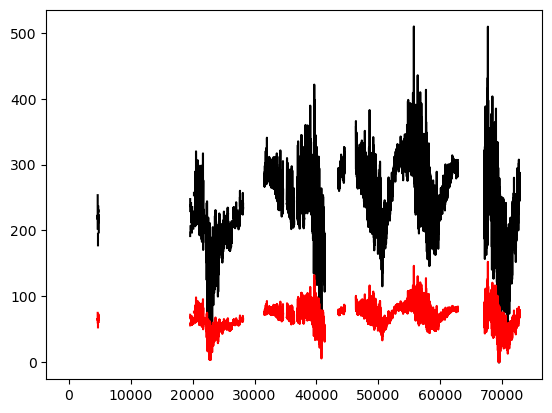

In [14]:
plt.plot(df['Dox'], c='k')
plt.plot(df['OxSat'], c='r')

In [15]:
# hangs the kernel I think: plt.plot(pd.to_datetime(df['ISO_DateTime_Local']), df['pCO2'])

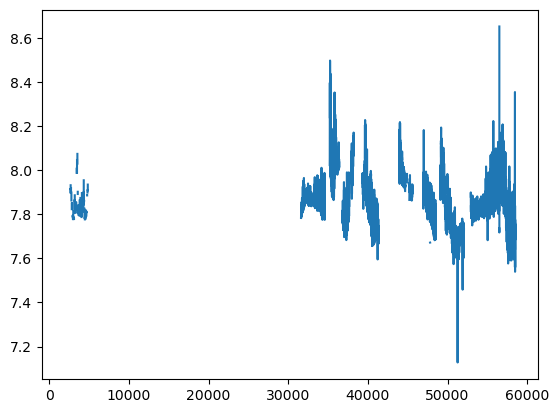

In [16]:
plt.plot(df['Sea_pH'])

In [53]:
# A snapshot of the first 17 rows of data: October 24 2016
#   Note that for this day there were two stations (shift in location between row 8 and 9)

print(f"Datetime                    DO      OxSat     STO       pCO2          Sea_pH   Sea_Temp_pH Sea_Temp_SBE Salinity  Lat       Lon")
for i in range(0, 200): 
    print(f"{df['ISO_DateTime_Local'][i]:<24}\
    {df['Dox'][i]:<8}{df['OxSat'][i]:<10}{df['Sea_Temp_Oxygen'][i]:<10}{df['pCO2'][i]:<10}\
    {df['Sea_pH'][i]:<9}{df['Sea_Temp_pH'][i]:<12}{df['Sea_Temp_SBE'][i]:<13}{df['Sal'][i]:<10}{df['Latitude'][i]:<10}{df['Longitude'][i]:<10}")

Datetime                    DO      OxSat     STO       pCO2          Sea_pH   Sea_Temp_pH Sea_Temp_SBE Salinity  Lat       Lon
2018-05-10T16:00:00-0700    255.948 71.866    9.576     nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T16:30:00-0700    nan     nan       nan       nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T17:30:00-0700    nan     nan       nan       nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T18:00:00-0700    259.638 73.136    9.711     nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T18:30:00-0700    nan     nan       nan       nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T19:00:00-0700    258.272 72.714    9.689     nan           nan      nan         nan          nan       48.5461   -123.007  
2018-05-10T19:30:00-0700    nan     nan       nan       nan   

In [ ]:
'Sea_pH', 'Sea_Temp_pH','Sea_Temp_SBE', 'Sal'

In [17]:
# This cell is a start on distilling slices of data down into a constrained dataframe